<p style="background-color:#A435F0;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Project - Udemy Courses</b></p>

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Udemy_logo.svg/1200px-Udemy_logo.svg.png" width="300" height="150"/>
</div>

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#outliers">Detecting Outliers</a></li>
<li><a href="#future-engineering">Future Engineering</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='import-library'></a>
# <font color='#A435F0'> <b>Importing Libraries</b><font color='black'> 

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='#A435F0'> <b>Loading The Dataset</b><font color='black'> 

In [3]:
df0 = pd.read_csv("udemy_courses_dataset.csv")
df = df0.copy()

In [4]:
# Display the first 5 rows of the DataFrame
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [5]:
# Randomly sample 5 rows from the DataFrame
df.sample(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1697,808808,Introduction to GIMP 2.8: Tutorials for Beginners,https://www.udemy.com/introduction-to-gimp-for...,True,20,282,8,28,Beginner Level,3.0,2016-04-01T17:31:53Z,Graphic Design
1589,895302,Adobe After Effect: Create 15 Advance Motion G...,https://www.udemy.com/15-advance-mograph-eleme...,True,30,140,6,21,All Levels,2.5,2016-07-07T23:27:41Z,Graphic Design
2765,821526,How To Make A Business Website In 1 Day With W...,https://www.udemy.com/how-i-make-a-professiona...,True,20,3759,24,25,Beginner Level,4.0,2016-04-18T15:23:27Z,Web Development
1611,379814,"Sketching: How to Draw People, Hands, Eyes, Bu...",https://www.udemy.com/sketching-drawing/,True,20,500,16,31,All Levels,2.0,2014-12-29T21:50:46Z,Graphic Design
938,371828,Manual Bookkeeping,https://www.udemy.com/manual-bookkeeping/,True,20,28,2,26,Intermediate Level,2.5,2015-07-24T20:42:34Z,Business Finance


<a id='understanding-dataset'></a>
# <font color='#A435F0'> <b>Understanding The Dataset</b><font color='black'> 

In [6]:
# Display the number of rows and columns.
df.shape

(3678, 12)

In [7]:
# Provides a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [8]:
# Generates descriptive statistics of numerical columns and transposes the result
df.describe().T


,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5


In [9]:
# Provides descriptive statistics for categorical (object) columns and then transposes the output for better readability.
df.describe(include="object").T

,count,unique,top,freq
course_title,3678,3663,Creating an animated greeting card via Google ...,3
url,3678,3672,https://www.udemy.com/understanding-financial-...,2
level,3678,4,All Levels,1929
published_timestamp,3678,3672,2016-12-15T14:56:17Z,2
subject,3678,4,Web Development,1200


In [10]:
# Generate a quick summary of the dataset, providing an overview of each column
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3678   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ course_id          │   0 │     0 │  676000 │  343300 │  8324 │ 407700 │ 687900 │ 961400 │ 1282000 │ ▅▆▇▇▇▆ │  │
│ │ price              │   0 │     0 │   66.05 │   61.01 │     0 │     20 │     45 │     95 │     200 │ ▇▆▂▁▁▃ │  │
│ │ num_subscribers    │   0 │     0 │    3197 │    9504 │     0 │    111 │  911.5 │   2546 │  268900 │   ▇    │  │
│ │ num_reviews        │   0 │     0 │   156.3 │   935.5 │     0 │      4 │     18 │     67 │   27440 │   ▇    │  │
│ │ num_lectures       │   0 │     0 │   40.11 │   50.38 │     0 │     15 │     25 │  45.75 │     779 │   ▇    │  │
│ │ content_duration   │   0 │     0 │   4.095 │   6.054 │     0 │      1 │      2 │    4.5 │    78.5 │   ▇    │  │
│ └────────────────────┴─────┴───────┴─────────┴─────────┴───────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ is_paid                            │            3368 │                          0.92 │       ▁    ▇        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ course_title                         │     0 │         0 │                      7.2 │                26418 │  │
│ │ url                                  │     0 │         0 │                        1 │                 3678 │  │
│ │ level                                │     0 │         0 │                        2 │                 7356 │  │
│ │ published_timestamp                  │     0 │      

In [11]:
# Counts the number of duplicate rows in the DataFrame.
df.duplicated().sum()

np.int64(6)

In [12]:
# Removes duplicate rows from the DataFrame.
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
# Number of missing (null) values for each column.
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

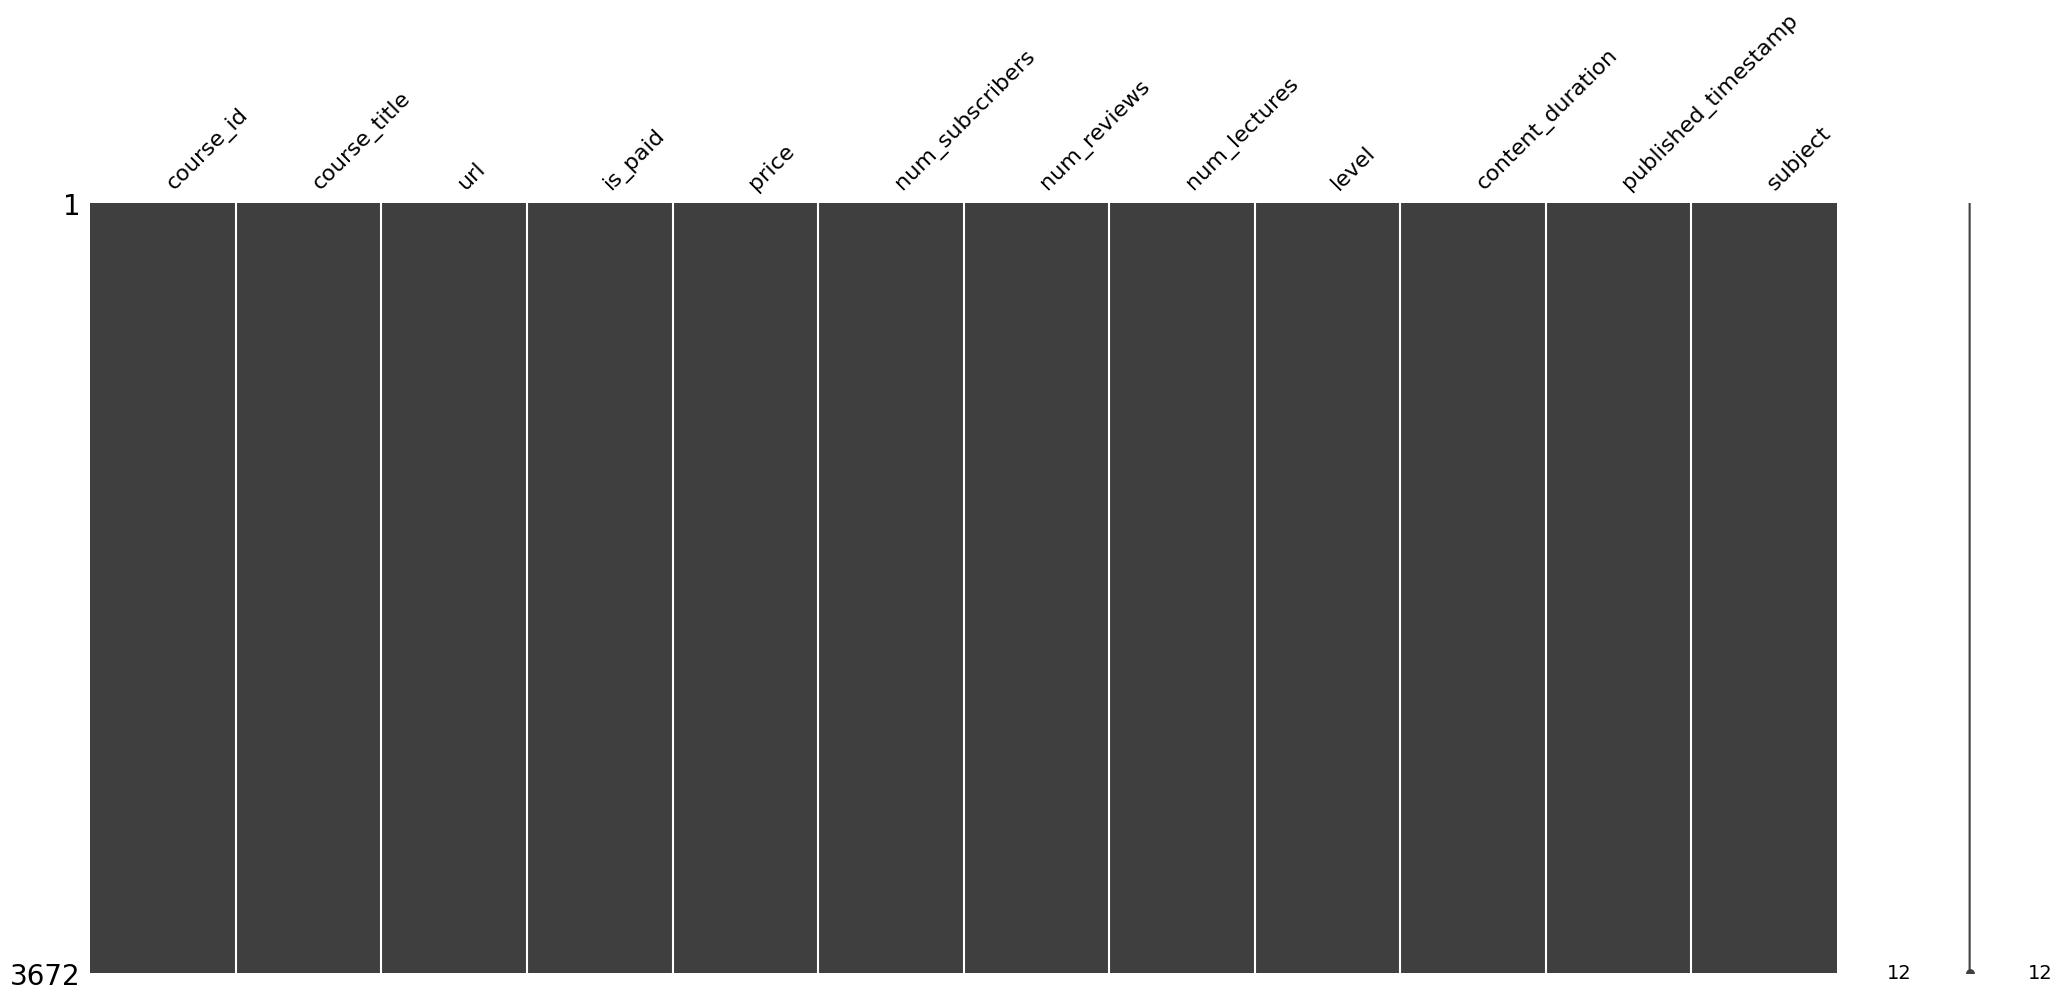

In [15]:
# Visualizes the missing values in the DataFrame using a missing value matrix from the missingno library.
msno.matrix(df);

<a id='organizing-columns'></a>
# <font color='#A435F0'> <b>Organizing Columns</b><font color='black'> 

In [16]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

### <font color='#C17CFA'> <b>"course_title" Column</b><font color='black'> 

In [17]:
# Removes leading and trailing whitespace.
df["course_title"] = df["course_title"].str.strip()

### <font color='#C17CFA'> <b>"url" Column</b><font color='black'> 

The 'url' column will not be used in this project, so we can drop it from the dataset.

In [18]:
# Dropping the url column
df = df.drop('url', axis=1)

In [19]:
df.columns = ['id', 'title', 'paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'duration',
       'published_time', 'subject']

In [20]:
df.columns

Index(['id', 'title', 'paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'published_time', 'subject'],
      dtype='object')

### <font color='#C17CFA'> <b>"paid" Column</b><font color='black'> 

In [21]:
# Returns the unique values
df.paid.unique()

array([ True, False])

In [22]:
# Returns the data type of the column.
df.paid.dtype

dtype('bool')

### <font color='#C17CFA'> <b>"price" Column</b><font color='black'> 

In [23]:
df.price.unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135])

### <font color='#C17CFA'> <b>"num_reviews" Column</b><font color='black'> 

In [24]:
df.num_reviews.dtype

dtype('int64')

### <font color='#C17CFA'> <b>"num_lectures" Column</b><font color='black'> 

In [25]:
df.num_lectures.dtype

dtype('int64')

### <font color='#C17CFA'> <b>"level" Column</b><font color='black'> 

In [26]:
df.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

### <font color='#C17CFA'> <b>"duration" Column</b><font color='black'> 

In [27]:
# Rounds the values in the duration column to two decimal places.
df.duration = df.duration.round(2)

### <font color='#C17CFA'> <b>"published_time" Column</b><font color='black'> 

In [28]:
# Clean up the published_time column
df['published_time'] = df['published_time'].str.replace('T', ' ').str.replace('Z', '')

In [29]:
# Converting the 'published_time' column to datetime format
df['published_time'] = pd.to_datetime(df['published_time'])

In [30]:
# for without time
# df['published_timestamp'] = pd.to_datetime(df['published_timestamp']).dt.date
# df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [31]:
# Returns the data type of the column
df.published_time.dtype

dtype('<M8[ns]')

### <font color='#C17CFA'> <b>"subject" Column</b><font color='black'> 

In [32]:
df.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

<a id='outliers'></a>
# <font color='#A435F0'> <b>Detecting Outliers</b><font color='black'> 

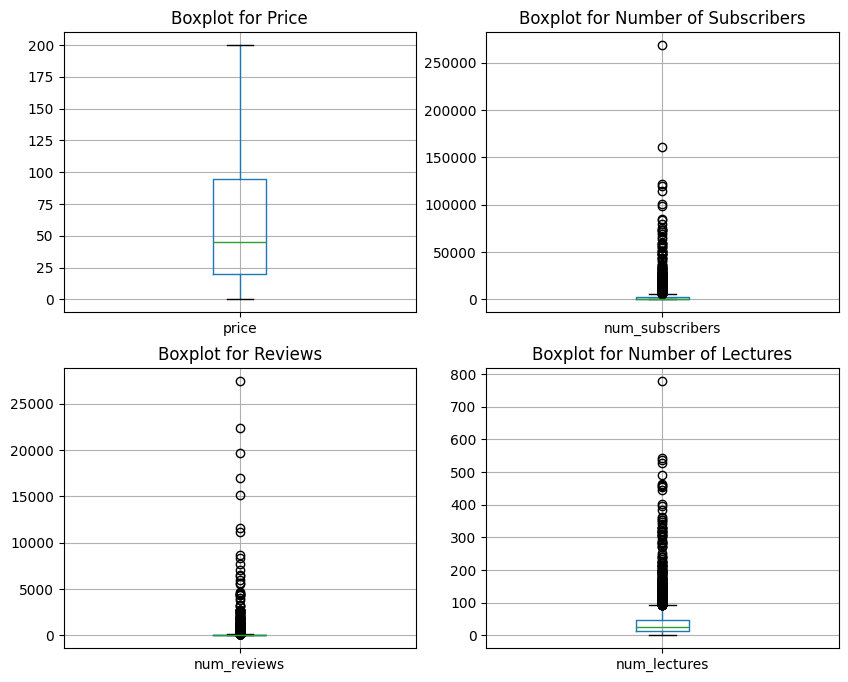

In [33]:
# Create a 2x2 grid for the box plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Boxplot for 'price'
df.boxplot(column='price', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot for Price')

# Boxplot for 'subscribers'
df.boxplot(column='num_subscribers', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot for Number of Subscribers')

# Boxplot for 'reviews'
df.boxplot(column='num_reviews', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot for Reviews')

# Boxplot for 'lectures'
df.boxplot(column='num_lectures', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot for Number of Lectures')

plt.show()

<a id='future-engineering'></a>
# <font color='#A435F0'> <b>Future Engineering</b><font color='black'> 

In [34]:
df.columns

Index(['id', 'title', 'paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'published_time', 'subject'],
      dtype='object')

In [35]:
#  Creating 'revenue' column
df["revenue"] = df["price"] * df["num_subscribers"]

In [36]:
# Extracting year from 'published_time' column
df["year"] = df["published_time"].dt.year

<a id='nan-values'></a>
#### <font color='#C17CFA'> <b>Creating "price_category" Column</b><font color='black'> 

In [37]:
# Categorize the price column 
# Low: 0 - 50
# Medium: 51 - 150
# High: 151 and above
labels = ['Low', 'Medium', 'High']
bins = [0, 50, 150, float('inf')] 
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

In [38]:
df.columns

Index(['id', 'title', 'paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'published_time', 'subject',
       'revenue', 'year', 'price_category'],
      dtype='object')

In [39]:
df = df.reindex(columns=['id', 'title', 'paid', 'price', 'price_category', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'published_time', 'year', 'subject',
       'revenue'])

In [40]:
df.sample(5)

,id,title,paid,price,price_category,num_subscribers,num_reviews,num_lectures,level,duration,published_time,year,subject,revenue
3328,708578,Bootstrap 4 Quick Start: Code Modern Responsiv...,False,0,Low,41478,2104,13,All Levels,3.0,2015-12-30 21:28:31,2015,Web Development,0
265,808506,Candlestick Analysis For Professional Traders,True,95,Medium,913,117,48,Expert Level,2.0,2016-05-18 16:04:14,2016,Business Finance,86735
2584,125162,Create and Deploy a Web App in 3 Hours,True,50,Medium,4123,23,34,Beginner Level,3.5,2013-12-04 22:49:28,2013,Web Development,206150
720,253810,"IAS 8-Accounting Policies ,Changes in Accounti...",False,0,Low,2122,30,15,All Levels,2.5,2014-10-03 12:29:41,2014,Business Finance,0
1906,574428,Fingerpicking Classics - Great songs played fi...,True,20,Low,953,11,13,All Levels,2.0,2015-08-07 22:08:40,2015,Musical Instruments,19060


<a id='data-visualization'></a>
# <font color='#A435F0'> <b>Data Visualization</b><font color='black'> 

<a id='nan-values'></a>
### <font color='#C17CFA'> <b>Course Price Distribution</b><font color='black'> 

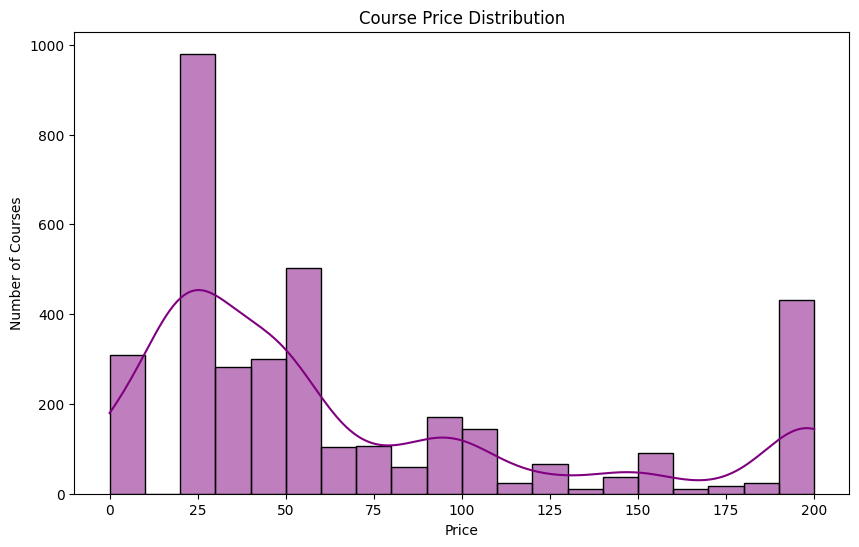

In [41]:
plt.figure(figsize=(10, 6))
# Create a histogram to show the distribution of course prices
sns.histplot(df['price'], bins=20, kde=True, color='purple')

plt.title('Course Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Courses')
plt.show()

In [42]:
price_dist = df.price_category.value_counts()
price_dist

price_category
Low       1871
Medium    1228
High       573
Name: count, dtype: int64

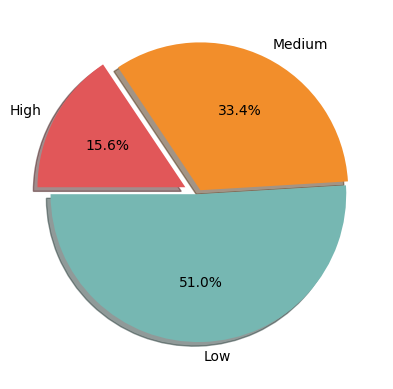

In [43]:
# Plotting the percentage of courses in each price category
plt.pie(x= price_dist.values,
        labels= price_dist.index,
        autopct="%1.1f%%",
        explode= [0, 0.03, 0.1],
        colors= ["#76b7b2", "#f28e2b", "#e15759"],
        shadow= True,
        startangle= 180
       )
# Make the background transparent
# plt.gcf().patch.set_alpha(0)

plt.show()

 This chart shows the distribution of course prices. Most courses are priced up to 25 USD, with a notable presence of free and low-priced courses. As the price increases, the number of courses decreases. However, a few courses priced at 200 USD indicate that high-priced courses also attract interest.

<a id='nan-values'></a>
### <font color='#C17CFA'> <b>Relationship Between Price and Number of Subscribers</b><font color='black'> 

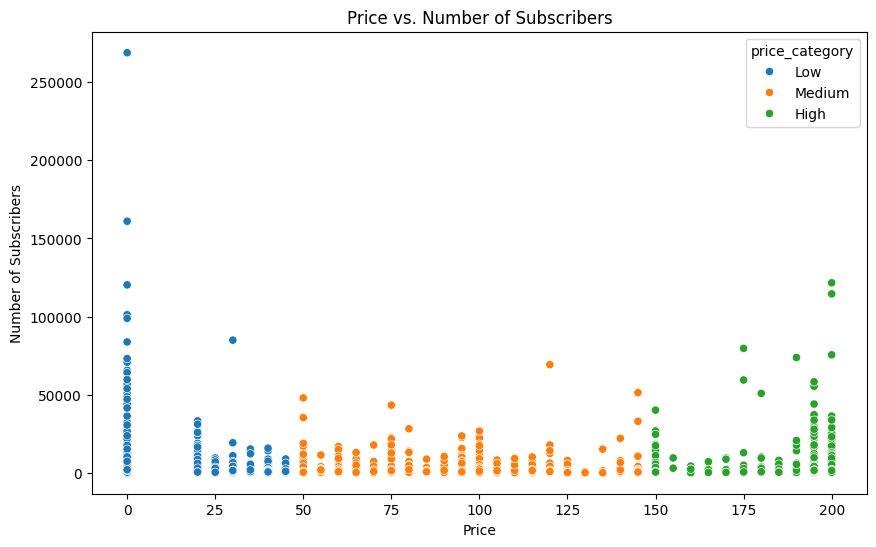

In [44]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))
# Create a scatter plot with 'price' on the x-axis and 'num_subscribers' on the y-axis
sns.scatterplot(x='price', y='num_subscribers', data=df, color='purple', hue= 'price_category')

# Set the title of the plot
plt.title('Price vs. Number of Subscribers')
plt.xlabel('Price')
plt.ylabel('Number of Subscribers')
# Display the plot
plt.show()

 Looking at this graph, we can observe the distribution of subscribers based on Udemy course prices. The main points highlighted by the graph are as follows:

**Overall Trend:**
Low-priced courses (particularly free ones) tend to attract significantly more subscribers. This suggests that affordable pricing has a strong influence on student enrollment. High-priced courses (around $150-$200) show that very few courses are priced at this level, and these courses generally have fewer subscribers, though there are some exceptions.

**Summary:**
 - Low-priced courses, especially those that are free, tend to reach the highest number of subscribers.
 - As the price increases, demand for the courses (in terms of subscriber numbers) generally decreases. However, some high-priced courses in certain categories still manage to attract a considerable number of subscribers.

**This visual clearly illustrates the impact of pricing on subscriber numbers, offering valuable insights for course creators on how to shape their pricing strategies.**

<a id='nan-values'></a>
### <font color='#C17CFA'> <b>Course Level Distribution</b><font color='black'> 

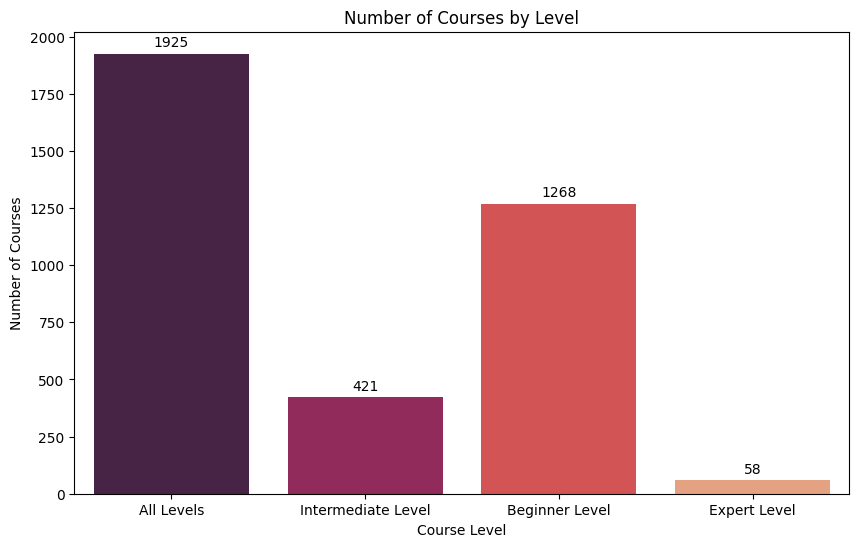

In [45]:

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a count plot to show the number of courses by level
ax1 = sns.countplot(x='level', data=df, palette='rocket')

# Add labels to the bars 
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black', padding=3)

# Set the title of the plot
plt.title('Number of Courses by Level')
plt.xlabel('Course Level')
plt.ylabel('Number of Courses')

# Display the plot
plt.show()


The graph shows the distribution of courses by level. The majority of courses are classified under "All Levels" (1925 courses), followed by Beginner Level with 1248 courses. There are very few Expert Level courses (only 36), indicating that most courses are designed to cater to a broader audience.

### <font color='#C17CFA'> <b>Subject-wise Analysis</b><font color='black'> 

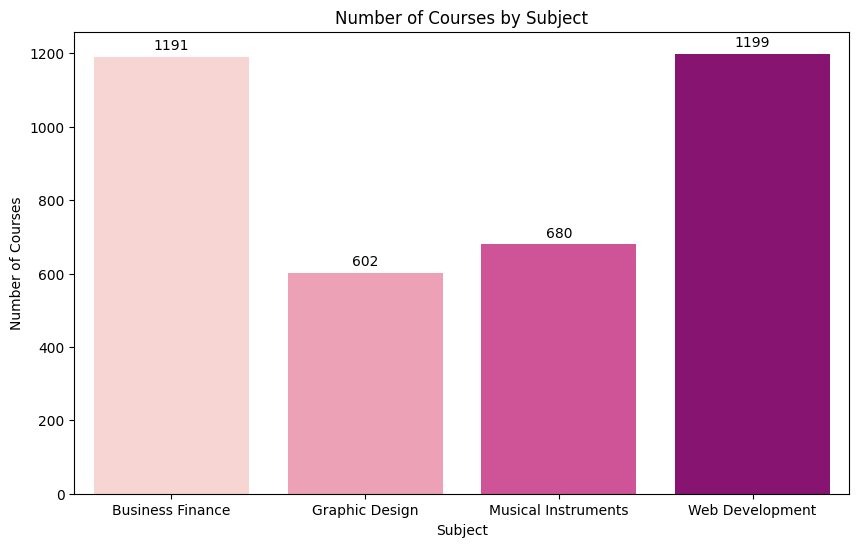

In [46]:
plt.figure(figsize=(10, 6))
# Create a count plot to show the number of courses by subject 
ax2 = sns.countplot(x='subject', data=df, palette='RdPu')
# Add labels to the bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black', padding=3)

plt.title('Number of Courses by Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Courses')

plt.show()

 The graph displays the distribution of courses by subject. "Business Finance" and "Web Development" stand out as the two categories with the highest number of courses. The Web Development category, in particular, has a significantly higher number of courses (1199), reflecting the high demand in technology and finance-related fields.

<a id='nan-values'></a>
### <font color='#C17CFA'> <b>Revenue Analysis by Year</b><font color='black'> 

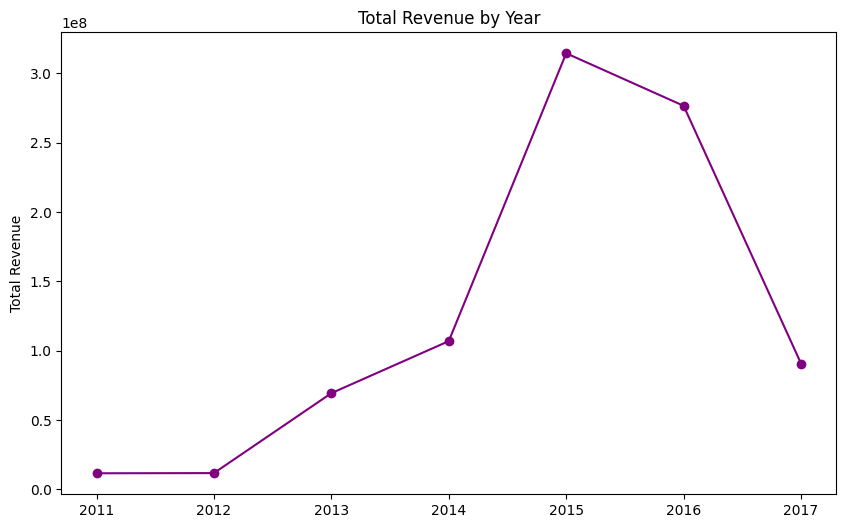

In [47]:
# Group the data by 'year' and sum the 'revenue' for each year
revenue_by_year = df.groupby('year')['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
# Create a line plot for total revenue by year
plt.plot(revenue_by_year['year'], revenue_by_year['revenue'], marker='o', color='purple')
# Set the title of the plot
plt.title('Total Revenue by Year')
plt.ylabel('Total Revenue')

plt.show()

 This graph shows the total revenue by year. From 2011 to 2015, there is steady growth in revenue, reaching its peak in 2015. However, after 2015, there is a noticeable decline, and by 2017, revenue drops below the 2014 level. This suggests that after a period of rapid growth, the platform experienced a decline in revenue.

<a id='nan-values'></a>
### <font color='#C17CFA'> <b>Content Duration Analysis</b><font color='black'> 

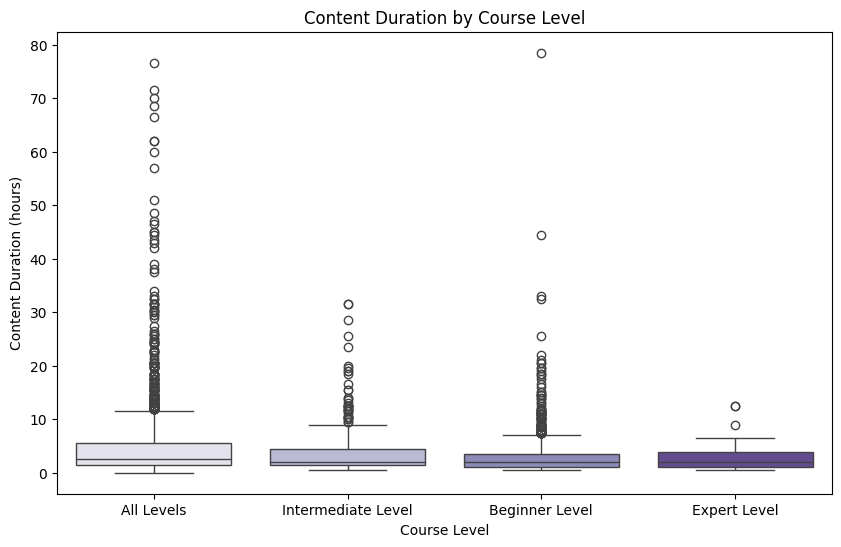

In [48]:
plt.figure(figsize=(10, 6))
# Create a box plot to show the distribution of content duration by course level
sns.boxplot(x='level', y='duration', data=df, palette='Purples')

plt.title('Content Duration by Course Level')
plt.xlabel('Course Level')
plt.ylabel('Content Duration (hours)')

plt.show()

This boxplot shows that:
 - All Levels, Intermediate, and Beginner courses have a similar median duration around 10 hours, with some outliers reaching up to 70-80 hours.
 - Expert Level courses are shorter on average, with a median around 5-7 hours, and fewer outliers reaching 30 hours.

*In summary, most courses, regardless of level, are around 10 hours, but expert-level courses tend to be shorter.*

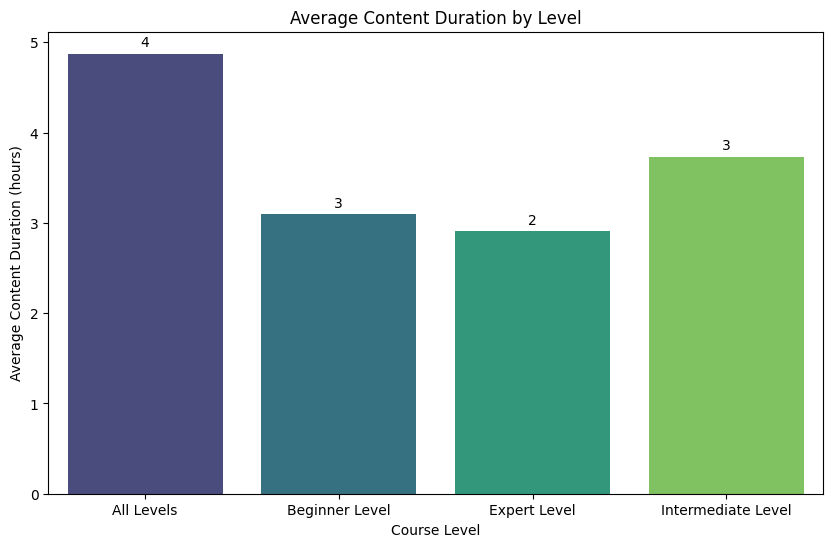

In [49]:
# Average Content Duration by Level
# Group the data by 'level' and calculate the mean duration for each level
avg_duration_by_level = df.groupby('level')['duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
# Create a bar plot to show the average content duration by course level
ax3 = sns.barplot(x='level', y='duration', data=avg_duration_by_level, palette='viridis')
# Add labels to the bars
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black', padding=3)

plt.title('Average Content Duration by Level')
plt.xlabel('Course Level')
plt.ylabel('Average Content Duration (hours)')

plt.show()

 This bar chart shows the average content duration (in hours) across different course levels:
 - All Levels courses have the longest average content duration, indicating that these courses are likely designed to cater to a broad audience with comprehensive content.
 - Beginner and Expert Levels have shorter average durations, suggesting that these courses may focus on more specific, foundational, or advanced topics, respectively.
 - The Intermediate Level courses have a slightly longer average duration than Beginner and Expert courses, indicating that they may cover more complex material without being as extensive as "All Levels" courses.

<a id='nan-values'></a>
### <font color='#C17CFA'> <b>Most Popular 10 Courses</b><font color='black'> 

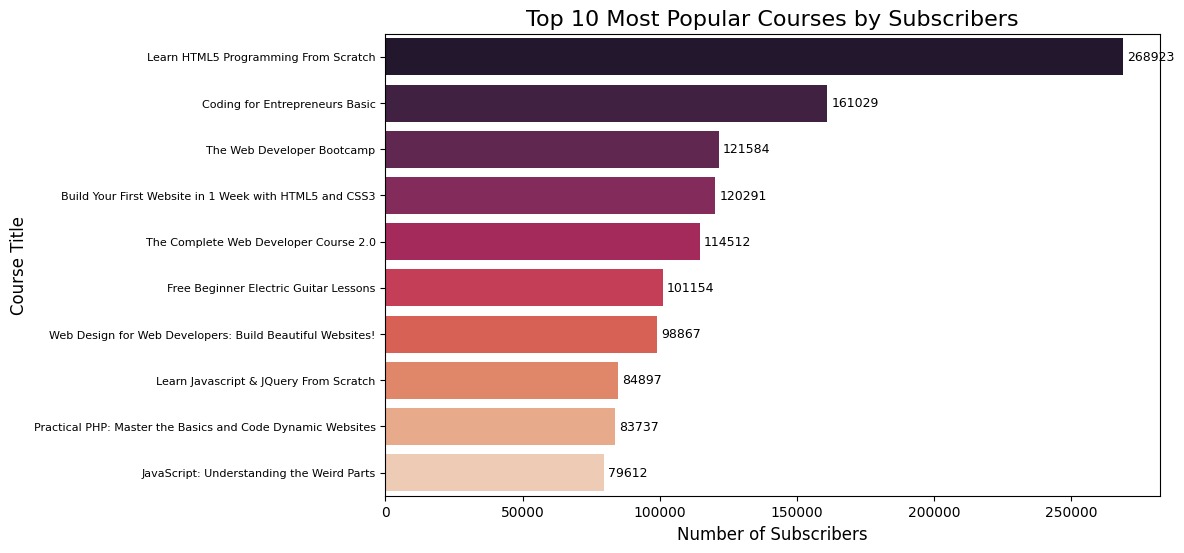

In [50]:
# Sort the DataFrame by 'num_subscribers' in descending order and select the top 10 courses
top10_courses = df.sort_values(by='num_subscribers', ascending=False)[:10]

plt.figure(figsize=(10,6))
# Create a horizontal bar plot showing the number of subscribers for the top 10 courses
ax4 = sns.barplot(x='num_subscribers', y='title', data=top10_courses, palette='rocket')
# Add labels to the bars
for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=3)
# Set the title of the plot
plt.title('Top 10 Most Popular Courses by Subscribers', fontsize=16)
plt.xlabel('Number of Subscribers', fontsize=12)
plt.ylabel('Course Title', fontsize=12)
plt.yticks(fontsize= 8)

plt.show()

 This bar chart presents the top 10 most popular Udemy courses based on the number of subscribers.

 - **Learn HTML5 Programming From Scratch** is the most popular course, with over 250,000 subscribers. This highlights the demand for foundational web development skills.
 - Other popular topics include **entrepreneurship basics, web development, and HTML/CSS**, indicating a strong interest in technical and business-related skills.
 - While technical courses dominate the list, it's notable that a non-technical course like Beginner Electric Guitar Lessons also ranks highly, showing diversity in learner interests.

### <font color='#C17CFA'> <b>Relationship Between Number of Lectures and Reviews</b><font color='black'> 

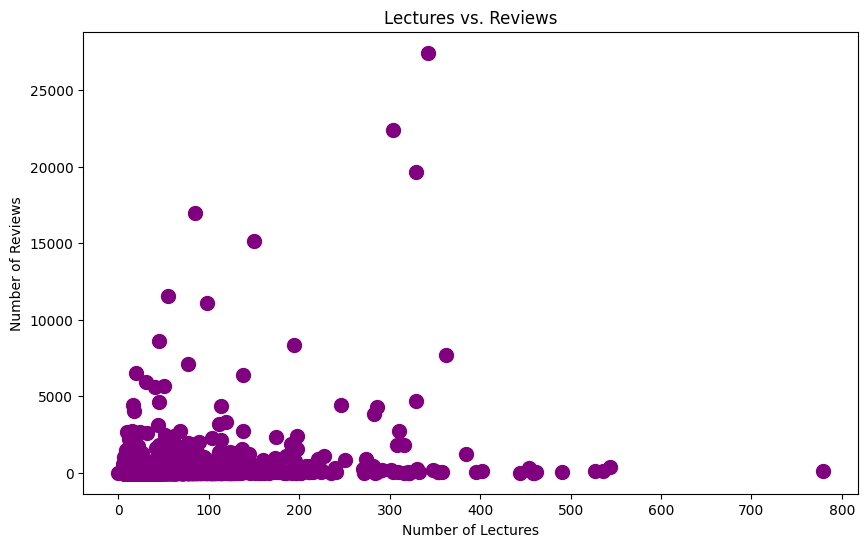

In [51]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))
# Create a scatter plot with 'num_lectures' on the x-axis and 'num_reviews' on the y-axis
plt.scatter(df['num_lectures'], df['num_reviews'], color='purple', s=100)

plt.xlabel('Number of Lectures')
plt.ylabel('Number of Reviews')
plt.title('Lectures vs. Reviews')

plt.show()

 This graph shows the relationship between the number of lectures and number of reviews. Courses with fewer lectures, particularly between 0 and 100, tend to have more reviews. However, as the number of lectures increases, there isn't a significant rise in the number of reviews. Courses with over 300 lectures tend to receive fewer reviews, indicating that more content doesn't necessarily lead to more engagement in terms of reviews.

<a id='nan-values'></a>
### <font color='#C17CFA'> <b>Paid and Free Courses Analysis</b><font color='black'> 

In [52]:
# Get the count of paid and free courses
paid_vs_free = df.paid.value_counts()
paid_vs_free.index = ["Paid", "Free"]
paid_vs_free

Paid    3362
Free     310
Name: count, dtype: int64

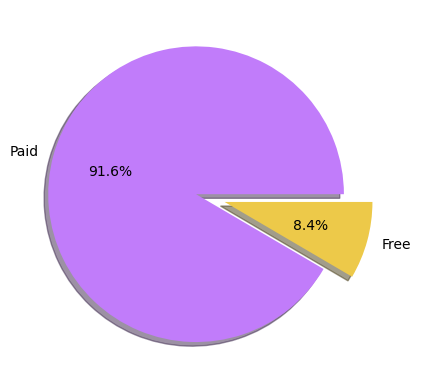

In [53]:
# Create a pie chart to visualize the distribution of paid and free courses
plt.pie(x= paid_vs_free.values,
        labels= paid_vs_free.index,
        autopct= "%1.1f%%",
        explode= [0, 0.2],
        colors= ["#C17CFA", "#EDC949"],
        shadow= True
       )

plt.show()

This pie chart shows the distribution between paid and free courses. It reveals that 91.6% of the courses on Udemy are paid, while only 8.4% are free. This indicates that the platform is primarily focused on paid content, with free courses being a small portion of the total offering.

<a id='nan-values'></a>
### <font color='#C17CFA'> <b>Correlation Analysis</b><font color='black'> 

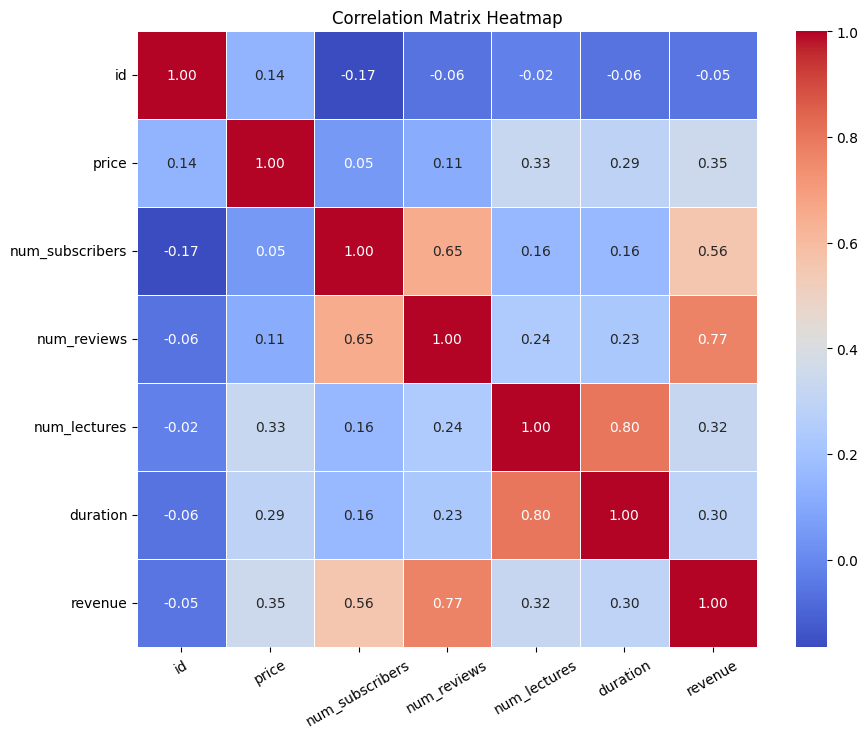

In [54]:
# Calculating the correlation matrix
correlation_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = correlation_df.corr()

plt.figure(figsize=(10, 8))
# Create a heatmap to visualize the correlation matrix 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.7, fmt=".2f")

plt.title('Correlation Matrix Heatmap')
# Rotate the x-axis labels by 30 degrees for better readability
plt.xticks(rotation= 30)

plt.show()



This heatmap shows correlations between variables, where the intensity of the color indicates the strength of the relationship.

**Revenue:**
 - Has a strong positive correlation with number of reviews (0.77), indicating that courses with more reviews tend to generate higher revenue.
 - There is also a positive relationship with number of subscribers (0.56), showing that more subscribers contribute to higher revenue.
 - Number of lectures and duration have weaker positive correlations with revenue (0.32 and 0.30).

**Number of Reviews and Subscribers:**
 - There is a strong correlation between these two variables (0.65), indicating that courses with more subscribers also tend to receive more reviews.

*This chart shows that the number of reviews and subscribers on courses are the biggest contributors to revenue.*

<a id='conclusion'></a>
# <font color='#A435F0'> <b>Conclusion</b><font color='black'> 

**Key Insights of Project:**
 - Most courses are priced low (below 50 USD), and free courses make up a significant portion.
 - Courses focused on technical skills (programming, web development) are the most popular.
 - "All Levels" courses tend to have longer content, while beginner-level courses are shorter.
 - Technical courses generate the highest revenue.

**Trends in Pricing, Popularity, and Revenue:**
 - Low-priced courses attract large audiences, while mid-priced courses are less popular.
 - Free courses have high subscriber counts, but paid technical courses are the main revenue drivers.
 - Revenue growth is most noticeable in technical areas and low-priced courses.

**Potential Improvements:**
 - Optimize pricing by increasing courses in the 10-50 USD range.
 - Balance short modular content with comprehensive long-form courses.
 - Leverage free courses to upsell to paid courses.
 - Enhance course discovery with personalized recommendations and better visibility for niche topics.

**This project was created to conduct analysis for use in developing Udemy's student attraction and revenue growth strategies.**

<p style="background-color:#A435F0;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>